In [2]:
import pickle
from sklearn_hierarchical_classification.constants import ROOT
from sklearn.linear_model import LogisticRegression
from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
import networkx as nx
import numpy as np

from src.models import HLGC
from src.data import Newsgroups

In [3]:
#data = pickle.load(open('data/cifar100-resnet18.pickle', 'rb'))
data = pickle.load(open('data/20newsgroups.pickle', 'rb'))

In [4]:
model = HLGC(20, 10000, [50, 50, 50, 50, 50], hidden_dim=128, label_dict=data['flat_label_dict'])

In [5]:
model.load('train_results/20newsgroups/model.weights')
model.eval()

HLGC(
  (input_dense): Linear(in_features=10000, out_features=128, bias=True)
  (categorical_layers): ModuleList(
    (0): CategoricalLayer(
      (dense_in): Linear(in_features=128, out_features=50, bias=True)
      (dense_out): Linear(in_features=178, out_features=128, bias=True)
    )
    (1): CategoricalLayer(
      (dense_in): Linear(in_features=128, out_features=50, bias=True)
      (dense_out): Linear(in_features=178, out_features=128, bias=True)
    )
    (2): CategoricalLayer(
      (dense_in): Linear(in_features=128, out_features=50, bias=True)
      (dense_out): Linear(in_features=178, out_features=128, bias=True)
    )
    (3): CategoricalLayer(
      (dense_in): Linear(in_features=128, out_features=50, bias=True)
      (dense_out): Linear(in_features=178, out_features=128, bias=True)
    )
    (4): CategoricalLayer(
      (dense_in): Linear(in_features=128, out_features=50, bias=True)
      (dense_out): Linear(in_features=178, out_features=128, bias=True)
    )
  )
  (glob

comp.os.ms-windows.misc : [0, 43, 42, 37, 13]
comp.sys.ibm.pc.hardware : [0, 43, 42, 31, 26]
comp.sys.mac.hardware : [0, 24, 1, 31, 26]
comp.windows.x : [0, 43, 35, 17, 47]
-----
alt.atheism : [1, 40, 38, 17, 47]
soc.religion.christian : [1, 38, 6, 31, 26]
talk.religion.misc : [1, 40, 6, 10, 16]
-----
misc.forsale : [13, 43, 42, 31, 26]
rec.autos : [13, 40, 6, 10, 26]
rec.motorcycles : [13, 18, 38, 10, 16]
rec.sport.baseball : [13, 14, 35, 37, 47]
rec.sport.hockey : [13, 40, 38, 17, 47]
-----
talk.politics.mideast : [18, 18, 38, 10, 16]
-----
sci.crypt : [24, 18, 35, 37, 47]
talk.politics.guns : [24, 40, 38, 17, 47]
talk.politics.misc : [24, 40, 6, 10, 16]
-----
sci.electronics : [33, 43, 6, 31, 26]
sci.med : [33, 18, 38, 22, 5]
sci.space : [33, 40, 6, 17, 16]
-----
comp.graphics : [39, 43, 35, 37, 13]


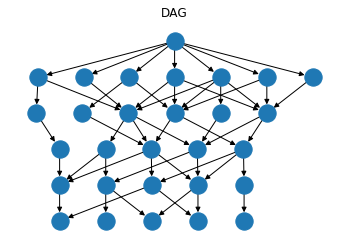

In [6]:
G, labeled_paths = model.generate_dag()

In [7]:
labeled_paths

[('comp.os.ms-windows.misc', [0, 43, 42, 37, 13]),
 ('comp.sys.ibm.pc.hardware', [0, 43, 42, 31, 26]),
 ('comp.sys.mac.hardware', [0, 24, 1, 31, 26]),
 ('comp.windows.x', [0, 43, 35, 17, 47]),
 ('alt.atheism', [1, 40, 38, 17, 47]),
 ('soc.religion.christian', [1, 38, 6, 31, 26]),
 ('talk.religion.misc', [1, 40, 6, 10, 16]),
 ('misc.forsale', [13, 43, 42, 31, 26]),
 ('rec.autos', [13, 40, 6, 10, 26]),
 ('rec.motorcycles', [13, 18, 38, 10, 16]),
 ('rec.sport.baseball', [13, 14, 35, 37, 47]),
 ('rec.sport.hockey', [13, 40, 38, 17, 47]),
 ('talk.politics.mideast', [18, 18, 38, 10, 16]),
 ('sci.crypt', [24, 18, 35, 37, 47]),
 ('talk.politics.guns', [24, 40, 38, 17, 47]),
 ('talk.politics.misc', [24, 40, 6, 10, 16]),
 ('sci.electronics', [33, 43, 6, 31, 26]),
 ('sci.med', [33, 18, 38, 22, 5]),
 ('sci.space', [33, 40, 6, 17, 16]),
 ('comp.graphics', [39, 43, 35, 37, 13])]

In [8]:
node_dict = dict([(x, ['{}_{}'.format(i, z) for i, z in enumerate(y)]) for x, y in labeled_paths])

In [9]:
node_dict['rec.autos']

['0_13', '1_40', '2_6', '3_10', '4_26']

In [10]:
train_labels = [data['flat_label_dict'][x] for x in data['train']['flat_labels']]
test_labels = [data['flat_label_dict'][x] for x in data['test']['flat_labels']]

In [11]:
train_node_labels = [node_dict[x] for x in train_labels]
train_leaf_labels = [x[-1] for x in train_node_labels]

test_node_labels = [node_dict[x] for x in test_labels]
test_leaf_labels = [x[-1] for x in test_node_labels]

In [12]:
graph = nx.relabel_nodes(G, {'ROOT' : ROOT})

In [13]:
clf = HierarchicalClassifier(
    base_estimator=LogisticRegression(class_weight='balanced'),
    class_hierarchy=graph
)

In [14]:
clf.fit(data['train']['features'], train_leaf_labels)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


HierarchicalClassifier(algorithm='lcpn',
            base_estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
            class_hierarchy=<networkx.classes.digraph.DiGraph object at 0x7f3a64e4f438>,
            feature_extraction='preprocessed', mlb=None,
            mlb_prediction_threshold=0.0, prediction_depth='mlnp',
            progress_wrapper=None, root='<ROOT>', stopping_criteria=None,
            training_strategy=None, use_decision_function=False)

In [15]:
hier_preds = [clf._recursive_predict(x[None, :], clf.root)[0] for x in data['test']['features']]
hier_preds = [x[1:] for x in hier_preds]

In [16]:
def hier_acc(preds, targets):
    global_acc = (np.array(preds) == np.array(targets)).mean()
    
    maxlen = max([len(x) for x in targets])

    acc = dict([(i, []) for i in range(maxlen)])
    for pred, label in zip(preds, targets):
        if len(pred) > len(label):
            pred = pred[:len(label)]
        elif len(pred) < len(label):
            pred += ['PAD' for _ in range(len(label) - len(pred))]

        for i in range(len(label)):
            acc[i].append(int(pred[i] == label[i]))
    acc = dict([(i, np.mean(v)) for i, v in acc.items()])
    acc['global'] = global_acc
    return acc

In [17]:
hier_acc(hier_preds, test_node_labels)

{0: 0.04992033988316516,
 1: 0.20791290493892725,
 2: 0.3292618162506638,
 3: 0.42020711630377056,
 4: 0.8352363250132767,
 'global': 0.3685077004779607}